# Project 04 EDA and Prelim Visualizations

In [54]:
import pickle

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
import datetime
import seaborn as sns

In [57]:
from datetime import datetime as dt

### Load in Data Frame
...commented out elements for re-runs if needed

In [58]:
df_tweets_final_processed = pickle.load( open( "df_tweets_final_processed.p", "rb" ) )

In [59]:
df_tweets_final_processed.shape

(198669, 9)

In [44]:
#df_tweets_final.drop(df_tweets_final.iloc[:, 8:9], inplace = True, axis = 1)

In [60]:
#df_tweets_final['month_year'] = pd.to_datetime(df_tweets_final['time']).dt.to_period('M')
df_tweets_final_processed.head(10)

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet
66,Veterans_Benefits_Admin mr secretary mcdono...,1361866444410155013,clickforjustice,clickforjustice,2021-02-16,21:33:57,1,0,0
70,Veterans_Benefits_Admin in howard became th...,1361854662488555525,lccc_sva,LCCC SVA,2021-02-16,20:47:08,1,0,0
74,Veterans_Benefits_Admin vbatribute trailbla...,1361854659409965057,lccc_sva,LCCC SVA,2021-02-16,20:47:07,1,0,0
78,in howard became the first female fourstar a...,1361842314264502273,vavetbenefits,Veterans Benefits,2021-02-16,19:58:04,1,0,0
82,vbatribute trailblazer michelle howard set m...,1361842311911497731,vavetbenefits,Veterans Benefits,2021-02-16,19:58:03,1,0,0
86,Veterans_Benefits_Admin are we going to see ...,1361835874980401153,papalima120,🇺🇸Paul L🇺🇸,2021-02-16,19:32:28,1,0,0
90,triwest you are contracted with the Veteran...,1361832899650101255,alyon_advocate,USAAdvocate,2021-02-16,19:20:39,1,0,0
94,denismcdonough joebiden potus vp barackob...,1361798977985810432,rex_fogleman,Rex Fogleman,2021-02-16,17:05:52,1,1,0
102,Veterans_Benefits_Admin we are the champions...,1361777768132976645,hiramg74466721,Hiram G,2021-02-16,15:41:35,1,0,0
106,Veterans_Benefits_Admin what is department_of...,1361749129072939012,rebecca_barber2,Rebecca Barber,2021-02-16,13:47:47,1,0,0


### Add in Date Specifics
...key processing step

In [61]:
df_tweets_final_processed['date'] = pd.to_datetime(df_tweets_final_processed['date'])

In [62]:
df_tweets_final_processed['dow'] = df_tweets_final_processed.date.dt.dayofweek
df_tweets_final_processed['week'] = df_tweets_final_processed.date.dt.to_period('W')
df_tweets_final_processed['week_alt']=df_tweets_final_processed.date.dt.year.astype(str) + '-w' + df_tweets_final_processed.date.dt.week.astype(str)

<ipython-input-62-c5f8d5800ca5>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_tweets_final_processed['week_alt']=df_tweets_final_processed.date.dt.year.astype(str) + '-w' + df_tweets_final_processed.date.dt.week.astype(str)


In [63]:
df_tweets_final_processed['month'] = df_tweets_final_processed['date'].dt.strftime('%Y-%m')

In [64]:
df_tweets_final_processed.shape

(198669, 13)

In [65]:
pickle.dump(df_tweets_final_processed, open("df_tweets_final_processed_w_dates.p", "wb" ) )

In [66]:
df_tweets_final_processed_w_dates = pickle.load( open( "df_tweets_final_processed_w_dates.p", "rb" ) )

In [67]:
df_tweets_final_processed_w_dates.head()

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month
66,Veterans_Benefits_Admin mr secretary mcdono...,1361866444410155013,clickforjustice,clickforjustice,2021-02-16,21:33:57,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
70,Veterans_Benefits_Admin in howard became th...,1361854662488555525,lccc_sva,LCCC SVA,2021-02-16,20:47:08,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
74,Veterans_Benefits_Admin vbatribute trailbla...,1361854659409965057,lccc_sva,LCCC SVA,2021-02-16,20:47:07,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
78,in howard became the first female fourstar a...,1361842314264502273,vavetbenefits,Veterans Benefits,2021-02-16,19:58:04,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
82,vbatribute trailblazer michelle howard set m...,1361842311911497731,vavetbenefits,Veterans Benefits,2021-02-16,19:58:03,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02


### Create Month Slices

In [68]:
df_oct2020_feb2021 = df_tweets_final_processed_w_dates[(df_tweets_final_processed_w_dates['date'] > '2020-9-30')]

In [69]:
df_oct2020_feb2021.shape

(38653, 13)

In [70]:
df_aug2020_feb2021 = df_tweets_final_processed_w_dates[(df_tweets_final_processed_w_dates['date'] > '2020-7-31')]

In [71]:
df_aug2020_feb2021.head()

,tweet,id,username,name,date,time,VBA Tweet,VA Tweet,VHA Tweet,dow,week,week_alt,month
66,Veterans_Benefits_Admin mr secretary mcdono...,1361866444410155013,clickforjustice,clickforjustice,2021-02-16,21:33:57,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
70,Veterans_Benefits_Admin in howard became th...,1361854662488555525,lccc_sva,LCCC SVA,2021-02-16,20:47:08,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
74,Veterans_Benefits_Admin vbatribute trailbla...,1361854659409965057,lccc_sva,LCCC SVA,2021-02-16,20:47:07,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
78,in howard became the first female fourstar a...,1361842314264502273,vavetbenefits,Veterans Benefits,2021-02-16,19:58:04,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02
82,vbatribute trailblazer michelle howard set m...,1361842311911497731,vavetbenefits,Veterans Benefits,2021-02-16,19:58:03,1,0,0,1,2021-02-15/2021-02-21,2021-w7,2021-02


In [72]:
pickle.dump(df_oct2020_feb2021, open("df_oct2020_feb2021.p", "wb" ) )

In [73]:
df_oct2020_feb2021 = pickle.load( open( "df_oct2020_feb2021.p", "rb" ) )

In [74]:
pickle.dump(df_aug2020_feb2021, open("df_aug2020_feb2021.p", "wb" ) )

In [75]:
df_aug2020_feb2021 = pickle.load( open( "df_aug2020_feb2021.p", "rb" ) )

In [76]:
df_aug2020_feb2021.shape

(56827, 13)

### Create basic EDA Graphics
...with additional graphics available at https://public.tableau.com/profile/rhys.carter#!/

In [88]:
%matplotlib inline
plt.figure(figsize=(16, 6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="month", hue="topic_count_10", data=df_tweets_final, ax=ax)

<AxesSubplot:xlabel='week', ylabel='count'>

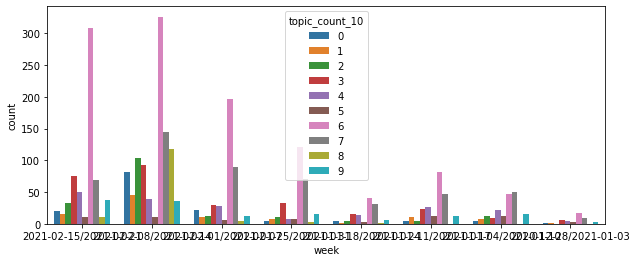

In [61]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="week", hue="topic_count_10", data=df_tweets_final, ax=ax)

In [63]:
df_tweets_final = df_tweets_final.sort_values(by=['week'],inplace = True)

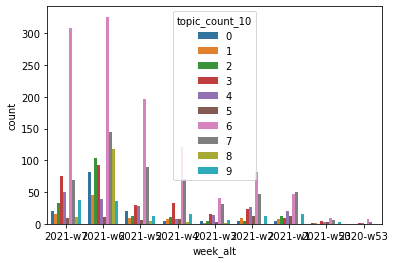

In [56]:
#df_tweets_final.plot(x ='date', y=df_tweets_final['topic_count_10'].value_counts(),kind = 'line')
ax = sns.countplot(x="week_alt", hue="topic_count_10", data=df_tweets_final)


In [ ]:
data_viz = df_tweets_final.groupby(['year','transaction_type','tier'], as_index=False)['no_of_purchases'].sum()

for i in list(data_viz['transaction_type'].unique()):
    viz = sns.lineplot(data=data_viz[data_viz['transaction_type'] == i], x='year', y='no_of_purchases', hue='tier')
    plt.title(i)
    plt.show()

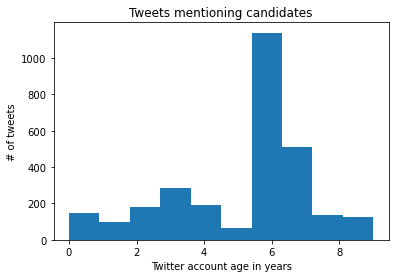

In [9]:
plt.hist(df_tweets_final["topic_count_10"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

In [70]:
df_tweets_final['date'] = pd.to_datetime(df_tweets_final['date'])
#df_tweets_final.info();

In [46]:
# To get the week number of the year
df_tweets_final.loc[:, 'Week'] = df_tweets_final['date'].dt.week


<ipython-input-46-4a236892f4a7>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_tweets_final.loc[:, 'Week'] = df_tweets_final['date'].dt.week


In [71]:
df_tweets_final['dow'] = df_tweets_final.date.dt.dayofweek
df_tweets_final['week'] = df_tweets_final.date.dt.to_period('W')
df_tweets_final['week_alt']=df_tweets_final.date.dt.year.astype(str) + '-w' + df_tweets_final.date.dt.week.astype(str)

<ipython-input-71-2da6c7953af1>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_tweets_final['week_alt']=df_tweets_final.date.dt.year.astype(str) + '-w' + df_tweets_final.date.dt.week.astype(str)


In [72]:
df_tweets_final.head()

,tweet,id,date,time,VBA Tweet,VA Tweet,VHA Tweet,topic_count_10,dow,week,week_alt
0,its time for smccvso sanmateoco veterans to ri...,1361892469500121089,2021-02-16,23:17:22,1,NaN,1,1,1,2021-02-15/2021-02-21,2021-w7
1,there should be another bill that temporarily ...,1361886795932262407,2021-02-16,22:54:49,1,NaN,NaN,6,1,2021-02-15/2021-02-21,2021-w7
2,Veterans_Benefits_Admin mr secretary mcdonou...,1361866444410155013,2021-02-16,21:33:57,1,NaN,NaN,3,1,2021-02-15/2021-02-21,2021-w7
3,Veterans_Benefits_Admin in howard became th...,1361854662488555525,2021-02-16,20:47:08,1,NaN,NaN,6,1,2021-02-15/2021-02-21,2021-w7
4,Veterans_Benefits_Admin vbatribute trailblaz...,1361854659409965057,2021-02-16,20:47:07,1,NaN,NaN,4,1,2021-02-15/2021-02-21,2021-w7


In [ ]:
# Or you can use the line below for the exact output you had
#df.loc[:, 'Week'] = df['Date'].dt.week - (df.sort_values(by='Date').iloc[0,0].week)
graph = sns.lineplot(data=df_tweets_final,x='Week',y='Ratio')

plt.show()